In [143]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import Sequential, Input
from keras.layers import Dense
from keras.activations import relu, softmax
from keras.losses import SparseCategoricalCrossentropy


In [144]:
df_submission = pd.read_csv('./playground-series-s4e2/sample_submission.csv')
df_train = pd.read_csv('./playground-series-s4e2/train.csv')
df_test = pd.read_csv('./playground-series-s4e2/test.csv')

In [145]:
df_train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [146]:
df_train = df_train.drop("id",axis=1)
df_test=df_test.drop("id",axis=1)

In [147]:
# Encoding categorical variables (one-hot encoding)

non_numerical_columns = ["Gender", "family_history_with_overweight",
                         "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
encoded_df_train = pd.get_dummies(df_train, columns=non_numerical_columns)
encoded_df_test = pd.get_dummies(df_test, columns=non_numerical_columns)

encoded_df_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,Overweight_Level_II,False,...,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,Normal_Weight,True,...,True,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,Insufficient_Weight,True,...,True,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,Obesity_Type_III,True,...,True,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,Overweight_Level_II,False,...,True,False,False,True,False,False,False,False,True,False


In [148]:
# Normalizing numerical features
numerical_columns = ["Age", "Height", "Weight",
                     "FCVC", "NCP", "CH2O", "FAF", "TUE"]
scaler = StandardScaler()
encoded_df_train[numerical_columns] = scaler.fit_transform(
    encoded_df_train[numerical_columns])
encoded_df_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,Overweight_Level_II,False,...,True,False,False,True,False,False,False,False,True,False
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,Normal_Weight,True,...,True,False,False,False,True,True,False,False,False,False
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,Insufficient_Weight,True,...,True,False,False,False,True,False,False,False,True,False
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,Obesity_Type_III,True,...,True,False,False,True,False,False,False,False,True,False
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,Overweight_Level_II,False,...,True,False,False,True,False,False,False,False,True,False


In [149]:
label_encoder = LabelEncoder()


#  encoding NObeyesdad feature since it takes values of string type
encoded_df_train['NObeyesdad'] = label_encoder.fit_transform(
    encoded_df_train['NObeyesdad'])
encoded_df_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,6,False,...,True,False,False,True,False,False,False,False,True,False
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1,True,...,True,False,False,False,True,True,False,False,False,False
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,0,True,...,True,False,False,False,True,False,False,False,True,False
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,4,True,...,True,False,False,True,False,False,False,False,True,False
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,6,False,...,True,False,False,True,False,False,False,False,True,False


In [150]:
#  Fill missing values
encoded_df_train = encoded_df_train.fillna(encoded_df_train.mean())
encoded_df_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,6,False,...,True,False,False,True,False,False,False,False,True,False
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1,True,...,True,False,False,False,True,True,False,False,False,False
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,0,True,...,True,False,False,False,True,False,False,False,True,False
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,4,True,...,True,False,False,True,False,False,False,False,True,False
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,6,False,...,True,False,False,True,False,False,False,False,True,False


In [151]:
# Extracting (feature) X and (result) y variable from training set

X = encoded_df_train.drop('NObeyesdad', axis=1)
y = encoded_df_train['NObeyesdad']

In [152]:
X.shape, y.shape


((20758, 30), (20758,))

In [153]:
#  train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [154]:
# Transforming training and test data to numpy array
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

# X_train = X_train.fill(X_train.mean())
# X_test = X_test.fill(X_test.mean())

# Model Building

In [161]:


model = Sequential(
    [
        Input(X_train.shape[1],),
        Dense(64, activation=relu, ),
        Dense(64, activation=relu, ),
        Dense(7, activation=softmax)
    ],
)

In [162]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )

In [163]:

history = model.fit(X_train, y_train, epochs=32,
                    batch_size=5, validation_split=0.1)

Epoch 1/32


/home/dheeraj/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2989/2989 [==============================] - 11s 4ms/step - loss: 0.5511 - accuracy: 0.7979 - val_loss: 0.4310 - val_accuracy: 0.8302
Epoch 2/32
2989/2989 [==============================] - 11s 4ms/step - loss: 0.3990 - accuracy: 0.8587 - val_loss: 0.3665 - val_accuracy: 0.8633
Epoch 3/32
2989/2989 [==============================] - 12s 4ms/step - loss: 0.3805 - accuracy: 0.8661 - val_loss: 0.3528 - val_accuracy: 0.8754
Epoch 4/32
2989/2989 [==============================] - 12s 4ms/step - loss: 0.3694 - accuracy: 0.8709 - val_loss: 0.3583 - val_accuracy: 0.8718
Epoch 5/32
2989/2989 [==============================] - 11s 4ms/step - loss: 0.3584 - accuracy: 0.8723 - val_loss: 0.3394 - val_accuracy: 0.8838
Epoch 6/32
 941/2989 [========>.....................] - ETA: 7s - loss: 0.3378 - accuracy: 0.8774

KeyboardInterrupt: 

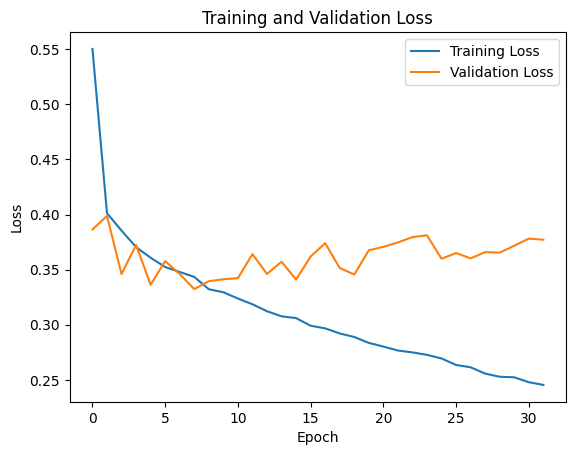

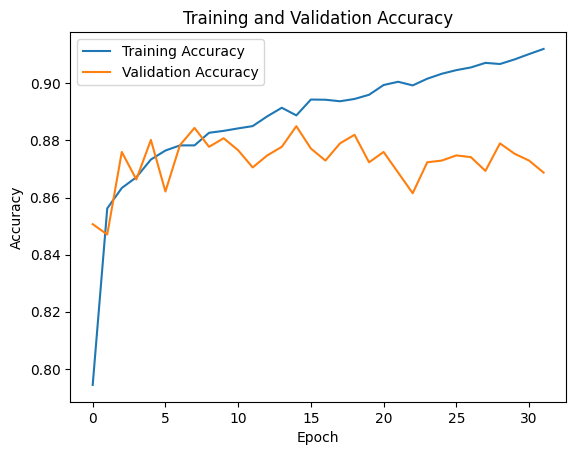

In [159]:
# Visualize training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [160]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')

130/130 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8663
Test Accuracy: 0.8663294911384583
Test Loss: 0.40351560711860657
